# Train Custom Dataset and predict by YOLOv5n-ultralytics

In [1]:
from google.colab.patches import cv2_imshow
import cv2

In [2]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15978, done.
remote: Counting objects: 100% (147/147), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 15978 (delta 89), reused 111 (delta 70), pack-reused 15831
Receiving objects: 100% (15978/15978), 14.60 MiB | 17.09 MiB/s, done.
Resolving deltas: 100% (10962/10962), done.


In [3]:
!cd yolov5; pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.6/599.6 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.5 MB/s eta 0:00:00


https://drive.google.com/file/d/1HKuG1qAK83Udq-e-tOFb--CPBB_rUvGp/view?usp=sharing

In [4]:
!wget --load-cookies ~/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies ~/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Rmd6oiaIWAzHFtL8lVKfoyGqVZFWd5oP' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1Rmd6oiaIWAzHFtL8lVKfoyGqVZFWd5oP" -O data.zip
!unzip -q data.zip

--2023-06-12 11:24:26--  https://docs.google.com/uc?export=download&confirm=t&id=1Rmd6oiaIWAzHFtL8lVKfoyGqVZFWd5oP
Resolving docs.google.com (docs.google.com)... 209.85.146.138, 209.85.146.113, 209.85.146.100, ...
Connecting to docs.google.com (docs.google.com)|209.85.146.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-04-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8bq4g0tbbh76dkrmm7p0b22valkqbuuo/1686569025000/00148754616075165078/*/1Rmd6oiaIWAzHFtL8lVKfoyGqVZFWd5oP?e=download&uuid=e8263af6-2563-4ce4-9bf4-7458d1f9d60f [following]
--2023-06-12 11:24:26--  https://doc-0s-04-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8bq4g0tbbh76dkrmm7p0b22valkqbuuo/1686569025000/00148754616075165078/*/1Rmd6oiaIWAzHFtL8lVKfoyGqVZFWd5oP?e=download&uuid=e8263af6-2563-4ce4-9bf4-7458d1f9d60f
Resolving doc-0s-04-docs.googleusercontent.com (doc-0s-04-docs.googleusercontent.com)... 74.125.69.132, 2

In [5]:
! touch YOLOv5.yaml

In [6]:
with open('/content/YOLOv5.yaml', 'w') as f:
  f.write('train: /content/images/train/\n')
  f.write('val: /content/images/val/\n')
  f.write('test: /content/images/test/\n\n')

  f.write('nc: 1\n')
  f.write("names: ['pothole']")

In [7]:
!cd yolov5; python train.py --img 1280 --batch 10 --epochs 100 --data /content/YOLOv5.yaml --weights yolov5n.pt --project /content --exist-ok

WARNING ⚠️ user config directory is not writeable, defaulting to '/tmp/Ultralytics'.
train: weights=yolov5n.pt, cfg=, data=/content/YOLOv5.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=10, imgsz=1280, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=/content, name=exp, exist_ok=True, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-178-ga199480 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, c

In [8]:
!cd yolov5; python detect.py --source /content/test.jpg --weights /content/exp/weights/best.pt --conf 0.02 --exist-ok --line-thickness 2

WARNING  user config directory is not writeable, defaulting to '/tmp/Ultralytics'.
detect: weights=['/content/exp/weights/best.pt'], source=/content/test.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.02, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=True, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-178-ga199480 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
Model summary: 157 layers, 1760518 parameters, 0 gradients, 4.1 GFLOPs
image 1/1 /content/test.jpg: 416x640 2 potholes, 82.5ms
Speed: 0.5ms pre-process, 82.5ms inference, 1.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


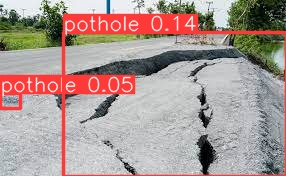

In [9]:
img = cv2.imread('/content/yolov5/runs/detect/exp/test.jpg')
cv2_imshow(img)